# Ulcer Index

“Ulcer Index measures the depth and duration of percentage drawdowns in price from earlier highs. The greater a drawdown in value, and the longer it takes to recover to earlier highs, the higher the UI. Technically, it is the square root of the mean of the squared percentage drawdowns in value. The squaring effect penalizes large drawdowns proportionately more than small drawdowns.”

The Ulcer Index measures risk by focusing on drawdowns represented by price declines. This means it is best suited for long-only investors or traders. The index hovers near zero when prices regularly record higher highs and advance. The index rises when prices move lower and extend from their recent high. Keep in mind that the Ulcer Index is not an indicator per se. It is just a measure of downside risk that can be used to compute risk-adjusted returns.
https://school.stockcharts.com/doku.php?id=technical_indicators:ulcer_index

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import classification_report_generator as crg
from ta.volatility import UlcerIndex
import sys
sys.path.insert(0, '..')
import useful_functions as uf

In [92]:
df = pd.read_csv("../data/BTCUSDT-minute-target-tpsl.csv")

## Variations and default correlations

In [8]:
def variations(windows:list[int]):
    """
    returns variations of atr indicator with given windows
    """
    name = "ui_"
    for w in windows:
        end = str(w)
        ui = UlcerIndex(df.close, window=w)
        df[name + end] = ui.ulcer_index()
        

In [9]:
variations([5, 10, 14, 20, 30, 40, 50, 70, 100, 150, 200, 300, 500, 1000]) #Many

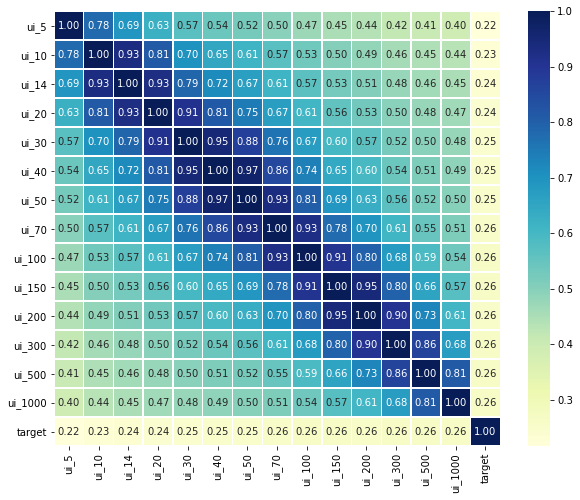

In [10]:
indicators = list(df.columns)[14:]
indicators.append("target")


d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

In [15]:
d = df[1800000:]

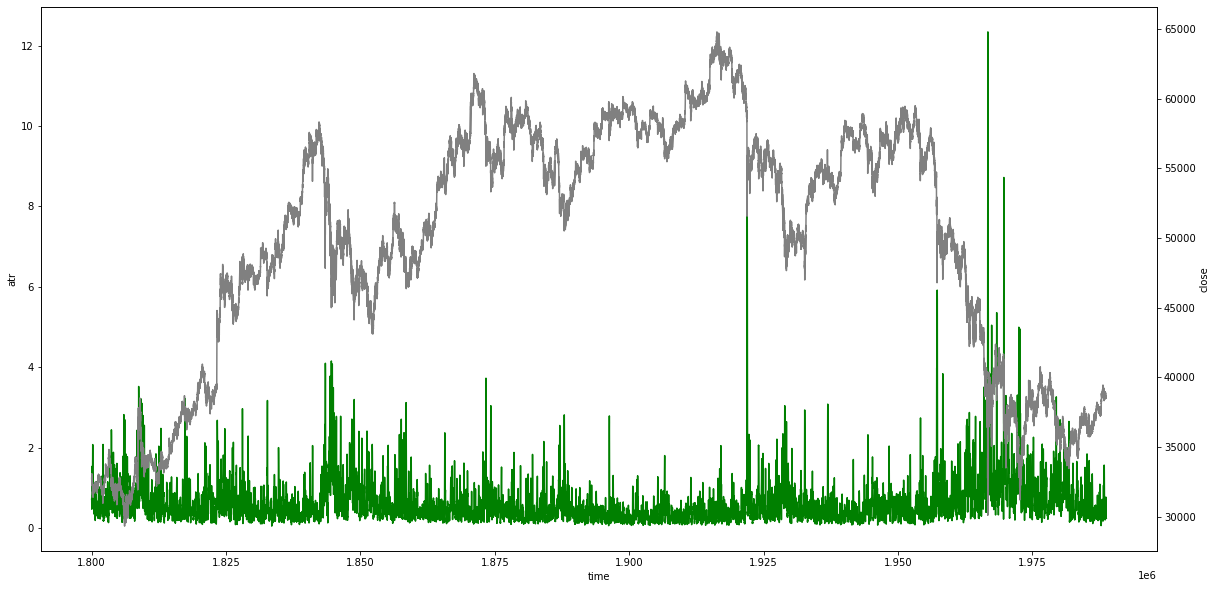

In [19]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(d.ui_50,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(d.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

## Get rate

In [45]:
dplot = df[["ui_70", "close"]].copy()
dplot["ui_70_rate"] = uf.get_rate(uf.get_moving_average(dplot.ui_70, 10))

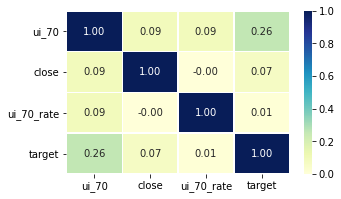

In [46]:
d = dplot.copy()
d["target"] = df.target
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(5, 3))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

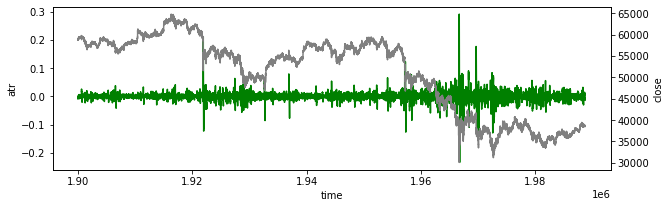

In [47]:
fig,ax = plt.subplots(figsize=(10, 3))
ax.plot(dplot.ui_70_rate[1900000:],
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(dplot.close[1900000:],
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

### Rate absolute

Note: may want to include rate even for 0.00 correlation because model may be able to pick up a pattern

In [48]:
# dplot = df[["ui_70", "close"]].copy()
dplot["ui_70_rate_abs"] = list(map(lambda x: abs(x), dplot.ui_70_rate))

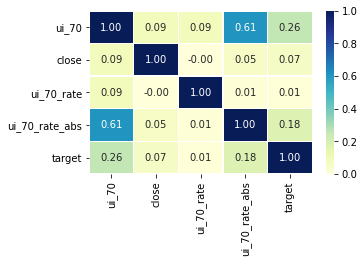

In [49]:
d = dplot.copy()
d["target"] = df.target
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(5, 3))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

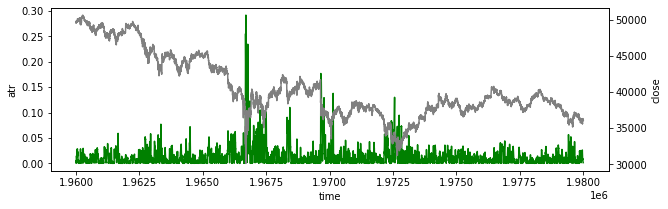

In [50]:
fig,ax = plt.subplots(figsize=(10, 3))
ax.plot(dplot.ui_70_rate_abs[1960000:1980000],
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(dplot.close[1960000:1980000],
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

### Normalize rate using square-root

In [54]:
dplot["ui_70_rate_abs_sqrt"] = list(map(lambda x: x**0.5, dplot.ui_70_rate_abs))

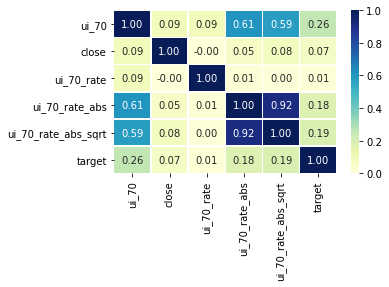

In [55]:
d = dplot.copy()
d["target"] = df.target
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(5, 3))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

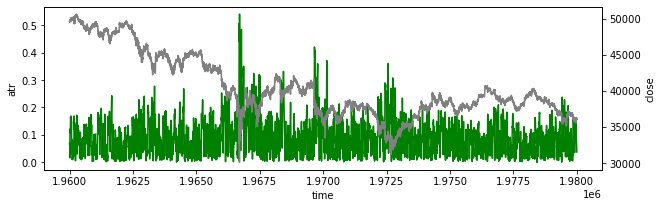

In [57]:
fig,ax = plt.subplots(figsize=(10, 3))
ax.plot(dplot.ui_70_rate_abs_sqrt[1960000:1980000],
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(dplot.close[1960000:1980000],
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

### Finding best variation with with rate abs sqrt

In [79]:
indicators = ["ui_5", "ui_10", "ui_20", "ui_50", "ui_100"]
dplot = df[indicators].copy()
dplot["close"] = df.close
for i in indicators:
    dplot[i + "_rate"] = uf.get_rate(uf.get_moving_average(dplot[i], 5))
    dplot[i + "_rate_log"] = list(map(lambda x: uf.log_abs(x, zeros=True), dplot[i + "_rate"]))
    dplot[i + "_rate_abs"] = list(map(lambda x: abs(x), dplot[i+"_rate"]))
    dplot[i + "_rate_abs_sqrt"] = list(map(lambda x: x**0.5, dplot[i + "_rate_abs"]))

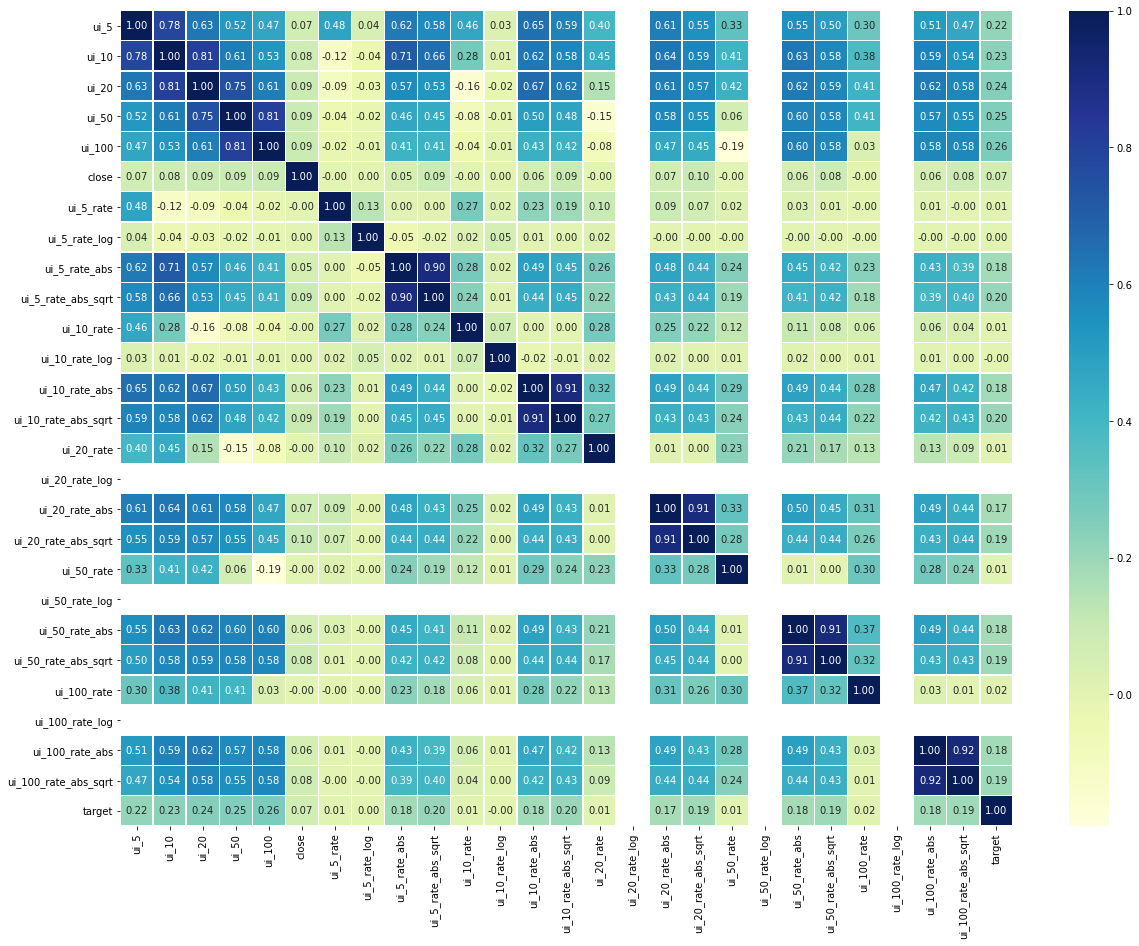

In [80]:
d = dplot.copy()
d["target"] = df.target
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

#### Result: No major winner, seems all to be the same, surprisingly all have relatively low correlation with eachother. May playout greatly

## Normalize
Does damping or amplifying affect the correlation and positively or negatively?

Does it help to filter out the noise from low values?

In [67]:
dplot = df[["ui_70"]].copy()
dplot["ui_70_log"] = list(map(lambda x: uf.log_abs(x, zeros=True), dplot.ui_70))
dplot["ui_70_no_noise_05"] = list(map(lambda x: x if x>0.5 else 0, dplot.ui_70))
dplot["ui_70_no_noise_07"] = list(map(lambda x: x if x>0.7 else 0, dplot.ui_70))
dplot["ui_70_no_noise_1"] = list(map(lambda x: x if x>1. else 0, dplot.ui_70))
dplot["ui_70_log_amp"] = list(map(lambda x: uf.log_abs(x*100, zeros=True), dplot.ui_70))
dplot["ui_70_amp"] = list(map(lambda x: x**1.5, dplot.ui_70))

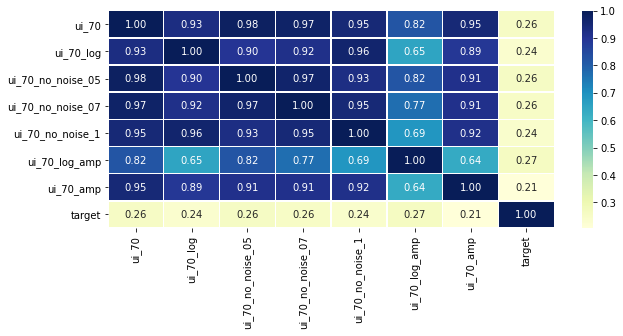

In [68]:
d = dplot.copy()
d["target"] = df.target
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

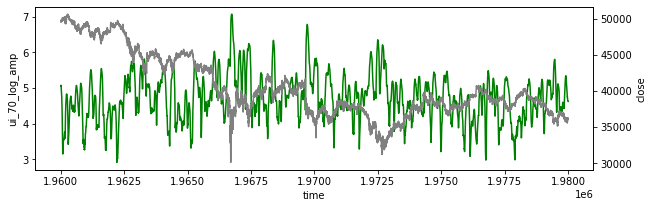

In [72]:
fig,ax = plt.subplots(figsize=(10, 3))
dplot["close"] = df.close
ax.plot(dplot.ui_70_log_amp[1960000:1980000],
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("ui_70_log_amp")

ax2=ax.twinx()
ax2.plot(dplot.close[1960000:1980000],
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

## Saving
Goal: find out whether base rate of ui matters and whether having multiple ui variations helps

In [93]:
def all_variations(windows:list[int]):
    """
    returns variations of atr indicator with given windows
    """
    name = "ui_"
    for w in windows:
        end = str(w)
        ui = UlcerIndex(df.close, window=w)
        i = name + end
        df[i] = ui.ulcer_index()
        df[i + "_rate"] = uf.get_rate(uf.get_moving_average(df[i], 5))
        df[i + "_rate_abs_sqrt"] = list(map(lambda x: abs(x)**0.5, df[i + "_rate"]))
        df[i + "_log_amp"] = list(map(lambda x: uf.log_abs(x*100, zeros=True), df[i]))

In [94]:
all_variations([5, 10, 20, 50, 100])

In [104]:
# indicators = list(df.columns[14:]) + ['target']

In [107]:
# d = df[list(indicators)].copy().astype(np.float32)
# d.dropna(inplace=True)

# X = d.drop(['target'], axis=1)[:-200000]
# y = d.target[:-200000]


In [111]:
df.to_csv("../data/BTCUSDT-minute-target-tpsl-ui.csv", index=False)

In [110]:
df

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,...,ui_20_rate_abs_sqrt,ui_20_log_amp,ui_50,ui_50_rate,ui_50_rate_abs_sqrt,ui_50_log_amp,ui_100,ui_100_rate,ui_100_rate_abs_sqrt,ui_100_log_amp
0,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,1502942459999,7.564907e+03,3,0.075183,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,1502942519999,0.000000e+00,0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1502942579999,1.117543e+03,2,0.261074,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,1502942639999,5.117185e+01,3,0.012008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,1502942699999,5.999993e+02,1,0.140796,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988733,2021-06-03 20:24:00,38665.26,38689.56,38655.91,38682.52,14.795718,1622751899999,5.722516e+05,457,5.929895,...,0.049973,3.014300,0.236519,-0.003217,0.056720,3.163442,0.791377,-0.005083,0.071297,4.371189
1988734,2021-06-03 20:25:00,38682.52,38682.53,38643.07,38649.70,16.778473,1622751959999,6.486770e+05,563,6.614560,...,0.046984,3.024372,0.234369,-0.003130,0.055949,3.154313,0.786794,-0.005038,0.070977,4.365381
1988735,2021-06-03 20:26:00,38649.69,38682.52,38649.69,38682.52,15.709853,1622752019999,6.074695e+05,566,11.004542,...,0.032761,3.025574,0.233598,-0.003066,0.055369,3.151015,0.782105,-0.004764,0.069022,4.359404
1988736,2021-06-03 20:27:00,38682.52,38682.69,38640.40,38649.38,23.010205,1622752079999,8.894626e+05,590,7.261787,...,0.032330,3.035546,0.234017,-0.002499,0.049991,3.152809,0.777671,-0.004714,0.068658,4.353718
